# TASK 1


 ## Iris Flowers Classification ML Project

# ABOUT THE PROJECT

Iris Flowers Classification — This particular Machine learning (ML) project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Iris Dataset — A multivariant dataset used for machine learning purposes. The following dataset contains a set of 150 records under five attributes sepal length sepal width petal length petal width species In this data set we analyze three species of Iris flower, i-e Iris setosa , Iris versicolor , and Iris verginica

Datasetlink: https://archive.ics.uci.edu/ml/datasets/iris

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\Lenovo PC\Desktop\MINI PROJECT\TASK 1\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Delete a Column
df=df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# To basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# To display no. of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
# Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# To display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

# Exploratory Data Analysis

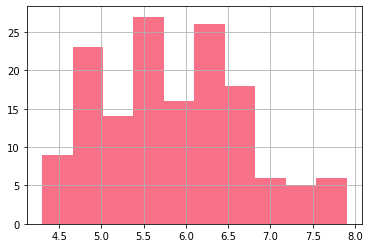

In [11]:
# Histograms
df['SepalLengthCm'].hist()

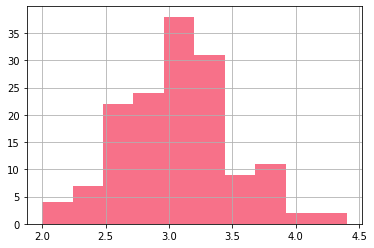

In [12]:
df['SepalWidthCm'].hist()

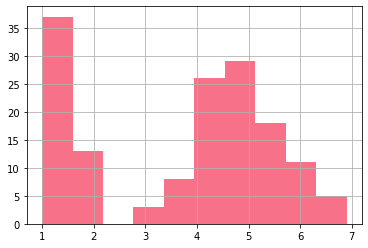

In [13]:
df['PetalLengthCm'].hist()

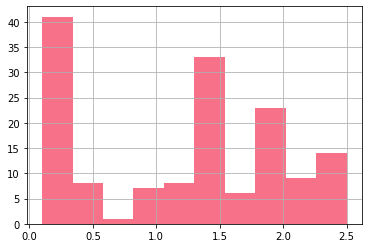

In [14]:
df['PetalWidthCm'].hist()

# Matrix correlation of dataset

A correlation matrix is a table which shows us the variables along with co-efficient. the individual cell in the table shows the correlation between two variables. values range ( -1 to 1 ). if two variables have high correlation , we can neglect one variable from those two.

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


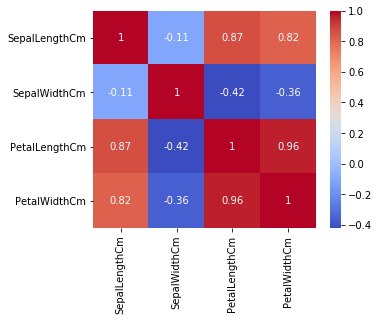

In [16]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [19]:
# Scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

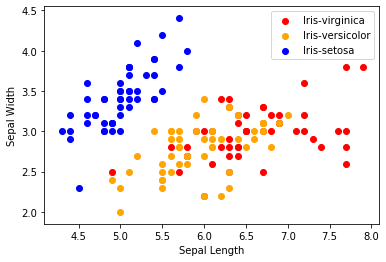

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

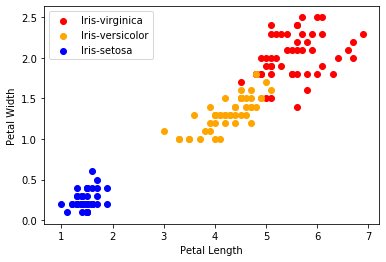

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

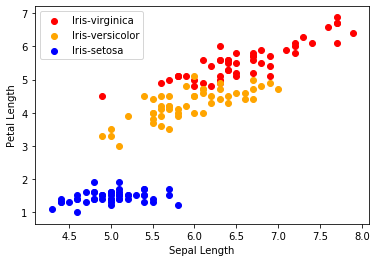

In [22]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

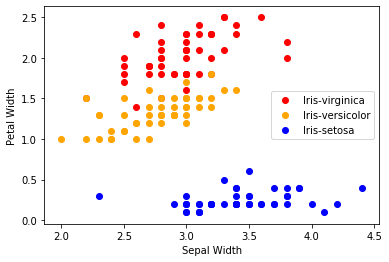

In [23]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Analysing the data visually

# I) BOX PLOT

Box plot is a percentile-based graph, which divides the data into four quartiles of 25% each. This method is used in statistical analysis to understand various measures such as mean, median and deviation

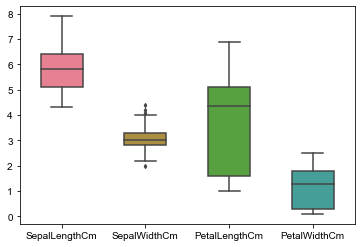

In [24]:
import seaborn as sns
sns.boxplot(data = df,width=0.5,fliersize=3)
sns.set(rc={'figure.figsize':(10,15)})

# II) SCATTER PLOT

To understand how each feature accounts for classification of the data, we can build a scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

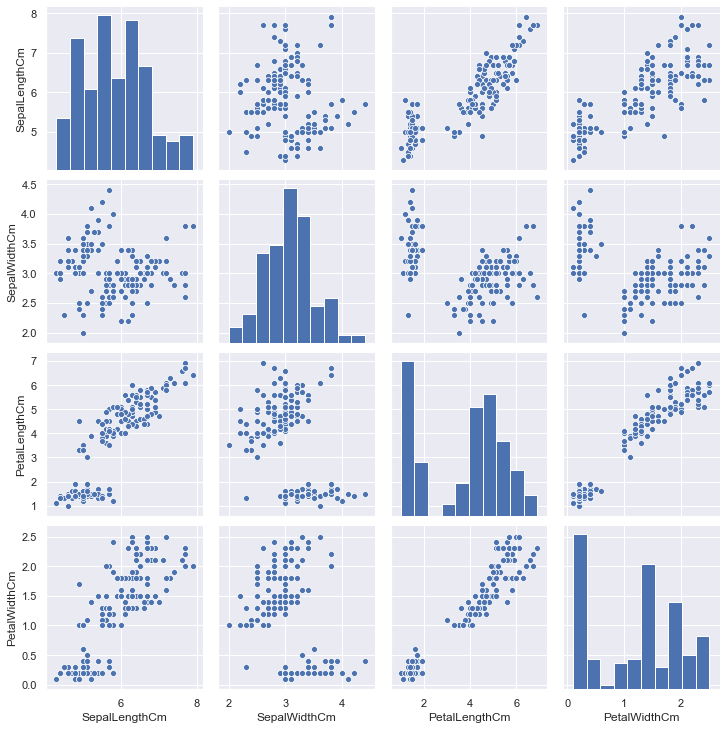

In [25]:
c=sns.load_dataset("iris")
sns.pairplot(data = df)
plt.show()

# III) REGPLOT

The regplot() function takes an argument logistic , which allows you to specify whether you wish to estimate the logistic regression model for the given data using true or false values. This will also produce the plot of the fit.

In [26]:
a=sns.load_dataset("iris")

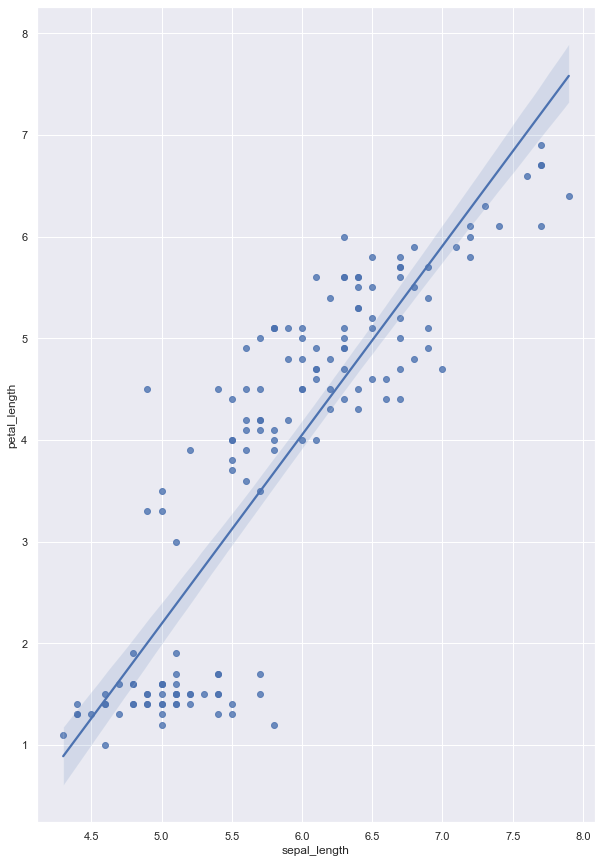

In [27]:
sns.regplot(x="sepal_length",y="petal_length",data=a)

# IV) CATAPLOT

The catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables, like boxplot, stripplot and so on. Catplot can handle 8 different plots currently available in seaborn.

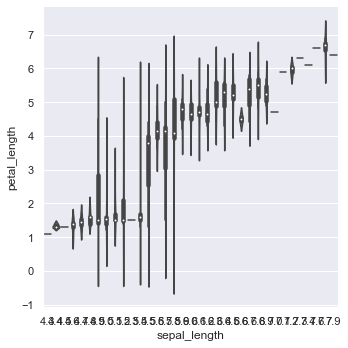

In [28]:

sns.catplot(x="sepal_length",y="petal_length",data=a, kind="violin", split =True);

# V) DISPLOT

The seaborn. distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

In [29]:
num=np.random.randn(150)

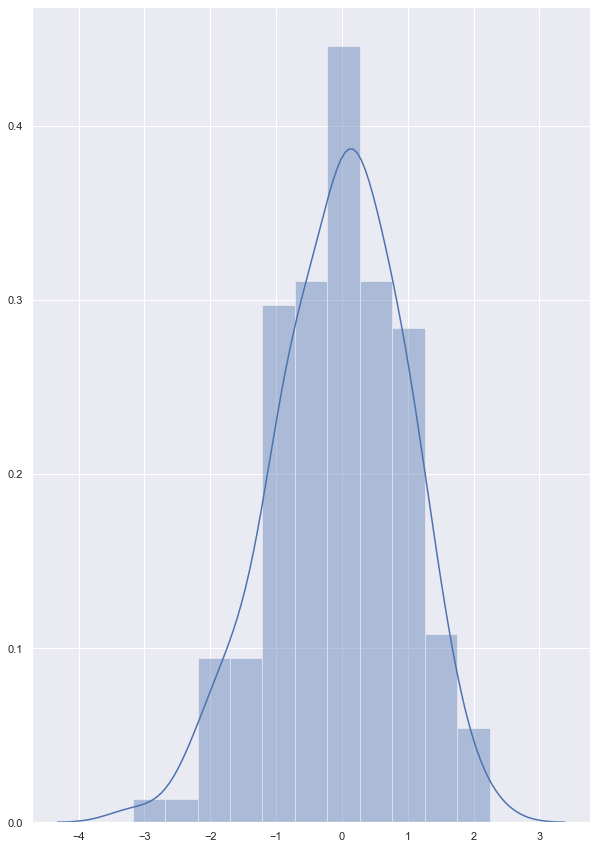

In [47]:
sns.distplot(num)

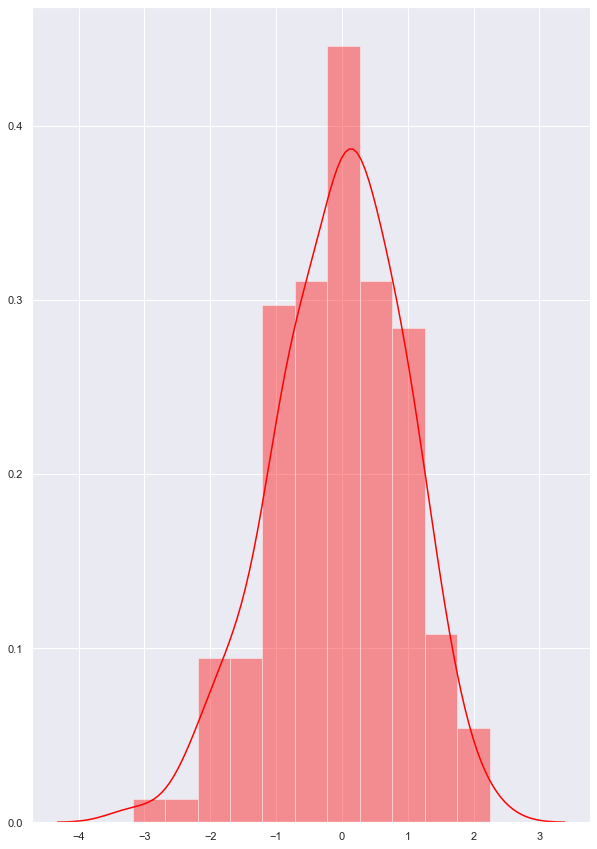

In [48]:
sns.distplot(num, color="red")

In [32]:
label_dist=pd.Series(num,name="x")

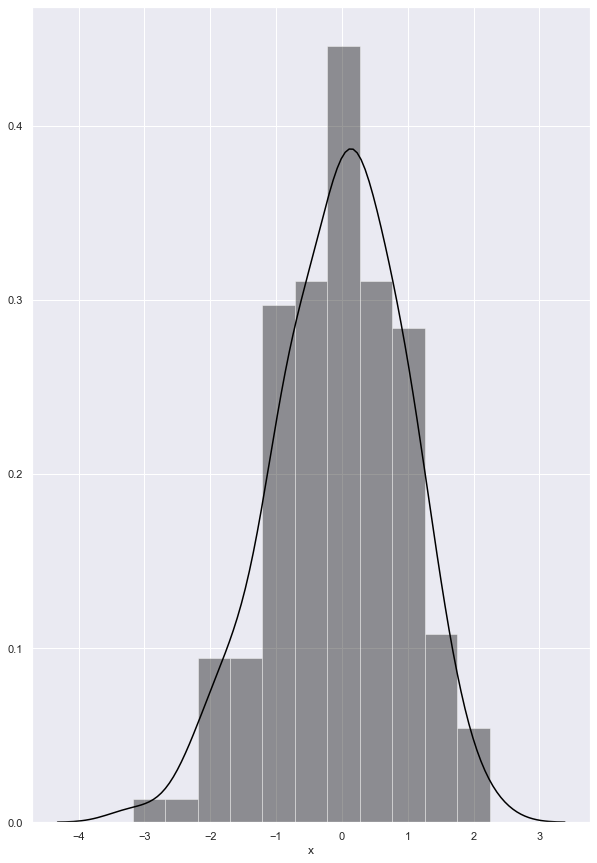

In [50]:
sns.distplot(label_dist,color="black")

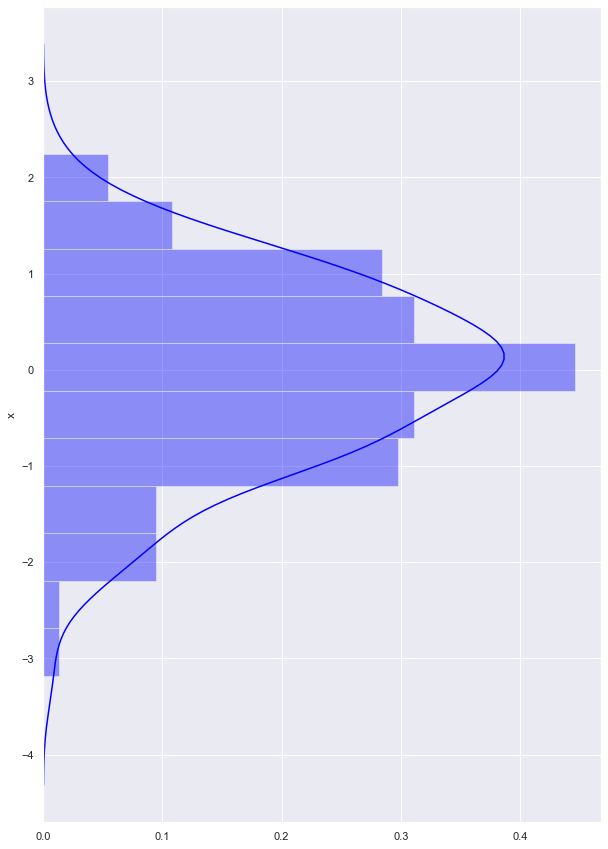

In [49]:
sns.distplot(label_dist,color="blue",vertical="True")

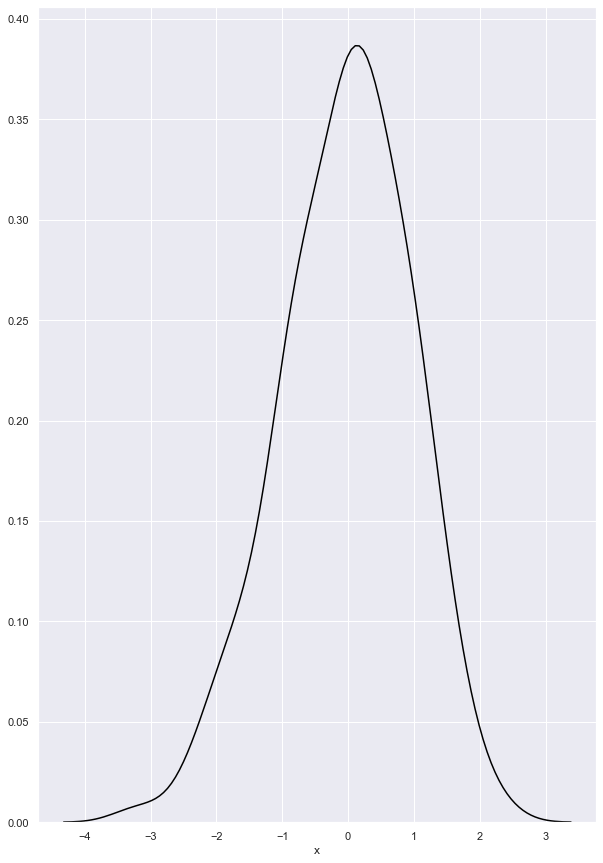

In [52]:
sns.distplot(label_dist,color="black",hist=False)

# VI) RUG PLOT

A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualize the distribution of the data. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.

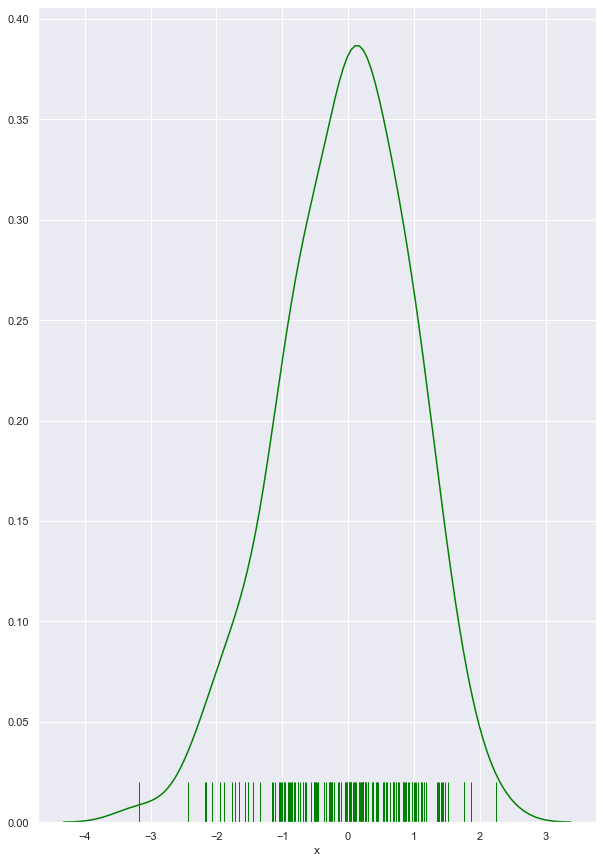

In [53]:
sns.distplot(label_dist,color="green",rug=True,hist=False)

# Step label encoding of dataset

In machine learning , we usually deal with datasets which contain multiple labels in one or more than one columns. the process of label encoding is use to convert the labels into numeric form.

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model training of dataset and accuracy checking 

Training dataset method is use to to train an algorithm or machine learning model to predict the outcome you design your model to predict. Test data is used to measure the performance, such as accuracy or efficiency, of the algorithm you are using to train the machine.

In [39]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [40]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
# model training
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [43]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [44]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
